In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import theano
import theano.tensor as T
from scipy import linalg
 
# number of input units
n_in = 5
# number of hidden units
n_hid = 10
# number of output units
n_out = 5
 
# Generate sinewaves offset in phase
n_timesteps = 50
d1 = 3 * np.arange(n_timesteps) / (2 * np.pi)
d2 = 3 * np.arange(n_in) / (2 * np.pi)
all_sines = np.sin(np.array([d1] * n_in).T + d2)
 
# Setup dataset and initial hidden vector of zeros
X = all_sines[:-1].astype('float32')
y = all_sines[1:].astype('float32')
print X.shape, y.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(49, 5) (49, 5)


In [12]:
import rnn
model = rnn.Rnn(n_in,n_hid,n_out, 0.001, single_output=False,output_activation=lambda x:x, cost_function='mse')

# RNN uses a mean squared error and a linear output activation. Feel free to change it in rnn.py

In [17]:
epochs = 2000
# Print 50 status updates along with last
status_points = list(range(epochs))
status_points = status_points[::epochs // 50] + [status_points[-1]]
for i in range(epochs):    
    pred = model.predictions(X)
    err = model.train(X, y)
    if i in status_points:
        print("Epoch %i: err %f" % (i, err))
 

Epoch 0: err 0.072155
Epoch 100: err 0.064896
Epoch 200: err 0.058165
Epoch 300: err 0.051952
Epoch 400: err 0.046247
Epoch 500: err 0.041035
Epoch 600: err 0.036298
Epoch 700: err 0.032017
Epoch 800: err 0.028168
Epoch 900: err 0.024725
Epoch 1000: err 0.021660
Epoch 1100: err 0.018946
Epoch 1200: err 0.016554
Epoch 1300: err 0.014454
Epoch 1400: err 0.012618
Epoch 1500: err 0.011019
Epoch 1600: err 0.009631
Epoch 1700: err 0.008431
Epoch 1800: err 0.007396
Epoch 1900: err 0.006505
Epoch 2000: err 0.005741
Epoch 2100: err 0.005086
Epoch 2200: err 0.004527
Epoch 2300: err 0.004049
Epoch 2400: err 0.003641
Epoch 2500: err 0.003294
Epoch 2600: err 0.002998
Epoch 2700: err 0.002747
Epoch 2800: err 0.002533
Epoch 2900: err 0.002351
Epoch 3000: err 0.002196
Epoch 3100: err 0.002064
Epoch 3200: err 0.001952
Epoch 3300: err 0.001856
Epoch 3400: err 0.001774
Epoch 3500: err 0.001704
Epoch 3600: err 0.001644
Epoch 3700: err 0.001593
Epoch 3800: err 0.001549
Epoch 3900: err 0.001510
Epoch 4000: 

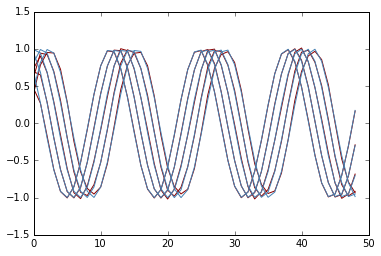

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pred, color="darkred")
plt.plot(y, color="steelblue")
plt.show()
